In [1]:
import pandas as pd
import numpy as np
# loading the required libraries
import os
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import statsmodels.formula.api as smf # linear regression --> Rsquared
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
random_state =  0

In [4]:
# reading data into the dataframe
df =pd.read_csv('acunetix.csv')

In [6]:
df.head()

,Unnamed: 0,Address,Time stamp,Method,URI,status code,User agent
0,0,192.168.4.25,[22/Dec/2016:16:30:52,POST,/administrator/index.php,303.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,1,192.168.4.25,[22/Dec/2016:16:29:05,POST,/index.php/component/search/,500.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
2,2,192.168.4.25,[22/Dec/2016:16:28:53,POST,/index.php/component/search/,303.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
3,3,192.168.4.25,[22/Dec/2016:16:32:50,POST,/index.php/component/search/,200.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
4,4,192.168.4.25,[22/Dec/2016:16:29:13,POST,/index.php/component/search/,200.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [7]:
df.columns

Index([u'Unnamed: 0', u'Address', u'Time stamp', u'Method', u'URI',
       u'status code', u'User agent'],
      dtype='object')

In [8]:
df.describe

<bound method DataFrame.describe of       Unnamed: 0       Address             Time stamp Method  \
0              0  192.168.4.25  [22/Dec/2016:16:30:52   POST   
1              1  192.168.4.25  [22/Dec/2016:16:29:05   POST   
2              2  192.168.4.25  [22/Dec/2016:16:28:53   POST   
3              3  192.168.4.25  [22/Dec/2016:16:32:50   POST   
4              4  192.168.4.25  [22/Dec/2016:16:29:13   POST   
5              5  192.168.4.25  [22/Dec/2016:16:29:33    GET   
6              6  192.168.4.25  [22/Dec/2016:16:24:39   POST   
7              7  192.168.4.25  [22/Dec/2016:16:28:52   POST   
8              8  192.168.4.25  [22/Dec/2016:16:28:58   POST   
9              9  192.168.4.25  [22/Dec/2016:16:21:56   POST   
10            10  192.168.4.25  [22/Dec/2016:16:20:49   POST   
11            11  192.168.4.25  [22/Dec/2016:16:18:20    GET   
12            12  192.168.4.25  [22/Dec/2016:16:28:11   POST   
13            13  192.168.4.25  [22/Dec/2016:16:25:15   POST   
14  

In [9]:
# checking the  shape of the dataset
df.shape


(6539, 7)

In [10]:
# check for missing values
print('Missing Values::\n',df.isnull().sum())

('Missing Values::\n', Unnamed: 0      0
Address         0
Time stamp      0
Method          0
URI             1
status code     2
User agent     33
dtype: int64)


In [11]:
## since the columns having many massing values am not going to use  ican just ingnore them ,and iwill later drop them. 

## DATA CLEANING

In [12]:
## Dropping un necessary columns
df = df.drop(['Unnamed: 0','Address','URI','User agent'],axis = 1)
df.head(2)

,Time stamp,Method,status code
0,[22/Dec/2016:16:30:52,POST,303.0
1,[22/Dec/2016:16:29:05,POST,500.0


Text(0,0.5,'frequency')

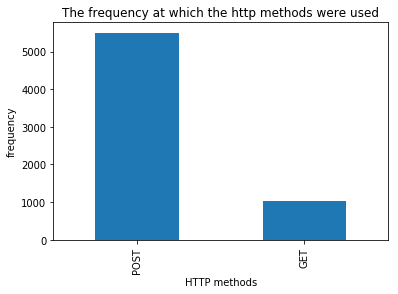

In [14]:
df['Method'].value_counts()[:20].plot(kind='bar')
plt.title('The frequency at which the http methods were used')
plt.xlabel('HTTP methods')
plt.ylabel('frequency')

In [17]:
# converting these columns to numeric because i want it to appear in my corr matrix,i'll convert it back after
df['Time stamp'] = pd.to_numeric(df['Time stamp'], errors='ignore')

In [18]:
df['Method'] = pd.to_numeric(df['Method'], errors='ignore')

In [19]:
df['status code'] = pd.to_numeric(df['status code'], errors='ignore')

In [20]:
df.head(5)

,Time stamp,Method,status code
0,[22/Dec/2016:16:30:52,POST,303.0
1,[22/Dec/2016:16:29:05,POST,500.0
2,[22/Dec/2016:16:28:53,POST,303.0
3,[22/Dec/2016:16:32:50,POST,200.0
4,[22/Dec/2016:16:29:13,POST,200.0
